In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dropout, RepeatVector, TimeDistributed, Dense
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.losses import MeanAbsoluteError
from keras.optimizers import Adam
from keras.models import load_model

In [2]:
df_train=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax_df1.csv")
df_train

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.000000,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.000000,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.000000,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.000000,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.000000,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
69796,2021-08-10 04:02:46,0.196721,0.929293,0.174472,0.034165,0.727114,1.098970e-12,0.0
69797,2021-08-10 04:03:05,0.196721,0.939394,0.049393,0.034165,0.733217,1.140609e-12,0.0
69798,2021-08-10 04:03:25,0.196721,0.939394,0.179029,0.027954,0.733217,1.124848e-12,0.0
69799,2021-08-10 04:04:04,0.213115,0.939394,0.190994,0.034165,0.743679,7.781265e-13,0.0


In [3]:
df_test=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax_df1.csv")
df_test

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-08-10 04:04:44,0.213115,0.939394,0.187534,0.027954,0.743679,8.349883e-13,0.0
1,2021-08-10 04:05:03,0.196721,0.939394,0.106389,0.027954,0.741935,9.811007e-13,0.0
2,2021-08-10 04:05:23,0.213115,0.929293,0.173815,0.027954,0.746295,1.053560e-12,0.0
3,2021-08-10 04:05:42,0.196721,0.939394,0.153370,0.040377,0.743679,8.061827e-13,0.0
4,2021-08-10 04:06:22,0.196721,0.939394,0.168819,0.037271,0.742807,8.308197e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.000000,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.000000,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.000000,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.000000,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [4]:
print(df_train.columns)
print(df_test.columns)

Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')
Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')


In [5]:
print(df_train.describe)
print(df_test.describe)

<bound method NDFrame.describe of                       Date  Temperature  Turbidity  Dissolved_Oxygen  \
0      2021-06-19 00:01:02     0.508197   1.000000          0.160656   
1      2021-06-19 00:01:22     0.491803   1.000000          0.384741   
2      2021-06-19 00:01:44     0.508197   1.000000          0.122764   
3      2021-06-19 00:02:07     0.508197   1.000000          0.935694   
4      2021-06-19 00:02:27     0.508197   1.000000          0.093913   
...                    ...          ...        ...               ...   
69796  2021-08-10 04:02:46     0.196721   0.929293          0.174472   
69797  2021-08-10 04:03:05     0.196721   0.939394          0.049393   
69798  2021-08-10 04:03:25     0.196721   0.939394          0.179029   
69799  2021-08-10 04:04:04     0.213115   0.939394          0.190994   
69800  2021-08-10 04:04:24     0.213115   0.939394          0.152931   

             pH   Nitrate       Ammonia  general_missing  
0      0.922358  0.129904  8.137705e-13   

In [6]:
print(df_train.shape)
print(df_test.shape)

(69801, 8)
(29916, 8)


## Anomaly Detection with GRU

### Feature Selection

In [7]:
# Select the features based on the analysis
selected_features = [
    'Temperature', 
    'Turbidity', 
    'Dissolved_Oxygen', 
    'pH', 
    'Nitrate'
]

X_train = df_train[selected_features]
X_test = df_test[selected_features]
# Convert DataFrame to NumPy array
X_train_np = X_train.values
X_test_np = X_test.values

# Verify the conversion
print(f"Shape of the data after converting to numpy array: {X_train_np.shape}")
print(f"Shape of the data after converting to numpy array: {X_test_np.shape}")

Shape of the data after converting to numpy array: (69801, 5)
Shape of the data after converting to numpy array: (29916, 5)


### Preparing Data for GRU

LSTM models require data in a specific 3D shape: (samples, time_steps, features). We need to reshape our dataset accordingly.

In [8]:
time_steps = 10 

X_train_lstm = np.array([X_train_np[i:i+time_steps] for i in range(len(X_train_np) - time_steps + 1)])
X_test_lstm = np.array([X_test_np[i:i+time_steps] for i in range(len(X_test_np) - time_steps + 1)])

# Verify the shape
print(f"Shape of the dataset after reshaping: {X_train_lstm.shape}")
print(f"Shape of the dataset after reshaping: {X_test_lstm.shape}")

Shape of the dataset after reshaping: (69792, 10, 5)
Shape of the dataset after reshaping: (29907, 10, 5)


### Convert Boolean and Integer Values to Floats

In [9]:
# Function to convert mixed types to floats
def convert_to_float(value):
    if isinstance(value, bool):
        return float(value)
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return value

# Apply the conversion function
X_train_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_train_lstm], dtype=np.float32)
X_test_lstm = np.array([[[convert_to_float(item) for item in sublist] for sublist in sequence] for sequence in X_test_lstm], dtype=np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_train_lstm[:1]}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Sample data from X_train_lstm after conversion: {X_test_lstm[:1]}")

Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.5081967  1.         0.16065598 0.92235804 0.12990409]
  [0.4918033  1.         0.38474098 0.9130471  0.12816042]
  [0.5081967  1.         0.12276427 0.91925895 0.12903225]
  [0.5081967  1.         0.93569374 0.90062326 0.12816042]
  [0.5081967  1.         0.09391296 0.9099411  0.12903225]
  [0.4918033  1.         0.0687899  0.92235804 0.12990409]
  [0.5081967  1.         0.12193577 0.916153   0.12903225]
  [0.5081967  1.         0.07086115 0.916153   0.12816042]
  [0.4918033  1.         0.4141771  0.91925895 0.12816042]
  [0.4918033  1.         0.16950144 0.9534176  0.12728858]]]
Data types in the dataset after conversion: float32
Sample data from X_train_lstm after conversion: [[[0.21311475 0.93939394 0.18753351 0.02795356 0.74367917]
  [0.19672132 0.93939394 0.1063892  0.02795356 0.7419355 ]
  [0.21311475 0.9292929  0.17381452 0.02795356 0.7462947 ]
  [0.19672132 0.93939394 0.1533

In [10]:
X_train_lstm = X_train_lstm.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)

# Verify the conversion
print(f"Data types in the dataset after conversion: {X_train_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_train_lstm.shape}")

print(f"Data types in the dataset after conversion: {X_test_lstm.dtype}")
print(f"Shape of the dataset after conversion: {X_test_lstm.shape}")

Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (69792, 10, 5)
Data types in the dataset after conversion: float32
Shape of the dataset after conversion: (29907, 10, 5)


In [11]:
assert X_train_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

assert X_test_lstm.dtype == np.float32, "Not all elements are float32 after conversion!"
print("All data is now of type float32.")

All data is now of type float32.
All data is now of type float32.


### Building the GRU Model

Now we’ll build the GRU. The encoder will learn to compress the input data, and the decoder will attempt to reconstruct it.

In [12]:
# Define the GRU model
model_gru = Sequential()

# Encoder: GRU layers
model_gru.add(GRU(256, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.3))
model_gru.add(GRU(128, activation='relu', return_sequences=False))
model_gru.add(Dropout(0.3))

# Bottleneck: Repeat the encoded output to match the original sequence length
model_gru.add(RepeatVector(X_train_lstm.shape[1]))

# Decoder: GRU layers
model_gru.add(GRU(128, activation='relu', return_sequences=True))
model_gru.add(Dropout(0.3))
model_gru.add(GRU(256, activation='relu', return_sequences=True))
model_gru.add(Dropout(0.3))

# Output layer: Reconstruct the original sequence
model_gru.add(TimeDistributed(Dense(X_train_lstm.shape[2])))

# Compile the model
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Summary of the model
model_gru.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 256)        │       201,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 10, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 10, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 5)          │         1,285 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,013 (2.85 MB)

 Trainable params: 747,013 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Hybrid Model

Once the model is defined, we train it similarly to how we would train the LSTM model.

In [13]:
# Train the GRU model
history_gru = model_gru.fit(X_train_lstm, X_train_lstm, epochs=20, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 101s 99ms/step - loss: 0.1141 - val_loss: 0.1676
Epoch 2/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 115s 117ms/step - loss: 0.1189 - val_loss: 0.1716
Epoch 3/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 121s 123ms/step - loss: 0.1194 - val_loss: 0.1703
Epoch 4/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 121s 123ms/step - loss: 0.1168 - val_loss: 0.1702
Epoch 5/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 122s 125ms/step - loss: 0.1272 - val_loss: 0.1885
Epoch 6/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 120s 122ms/step - loss: 0.1441 - val_loss: 0.1949
Epoch 7/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 114s 116ms/step - loss: 0.1520 - val_loss: 0.1825
Epoch 8/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 119s 121ms/step - loss: 0.1979 - val_loss: 0.1753
Epoch 9/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 121s 123ms/step - loss: 0.1990 - val_loss: 0.1747
Epoch 10/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 267s 272ms/step - loss: 0.1989 - val_loss: 0.1744
Epoch 11/20
982/982 ━━━━━━━━━━━━━━━━━━━━ 2134s 2s/step - loss: 0.1988 - val_loss: 0.1741
Epoch 12/20

### Evaluate the GRU Model

Post-training, evaluate the model’s performance using reconstruction error:

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step
Anomaly detection threshold: 0.18445392400026323
Number of anomalies detected: 3490


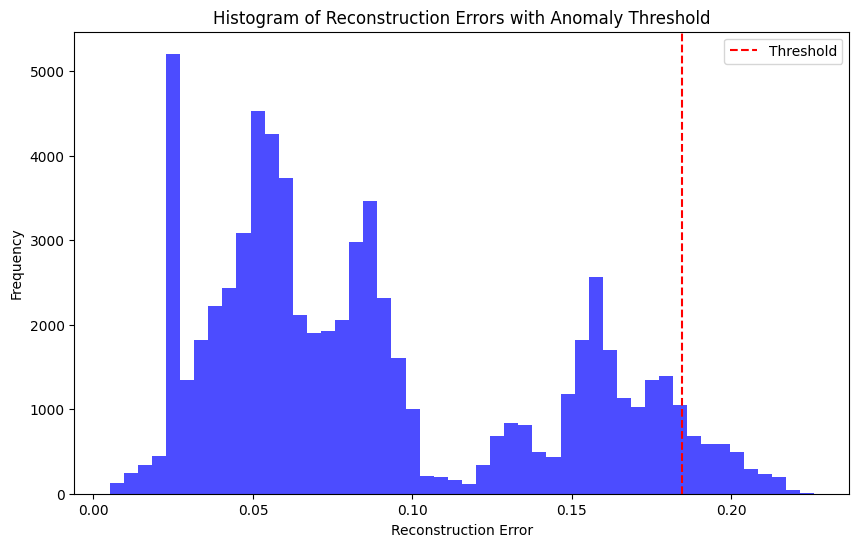

In [14]:
# Predict using the model
X_train_pred_gru = model_gru.predict(X_train_lstm)

# Calculate reconstruction error
train_mse_loss_gru = np.mean(np.power(X_train_lstm - X_train_pred_gru, 2), axis=(1, 2))

# Set a threshold for anomaly detection (e.g., 90th percentile)
threshold_gru = np.percentile(train_mse_loss_gru, 95)

# Detect anomalies
anomalies_train_gru = train_mse_loss_gru > threshold_gru
print(f"Anomaly detection threshold: {threshold_gru}")
print(f"Number of anomalies detected: {np.sum(anomalies_train_gru)}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train_mse_loss_gru, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold_gru, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Reconstruction Errors with Anomaly Threshold')
plt.show()

#### Evaluate Your Model Against This True_Anomaly

In [15]:
df_train_adjusted = df_train.iloc[time_steps-1:].copy()

In [16]:
threshold_gru = np.percentile(train_mse_loss_gru, 95)  # 95th percentile threshold

# Create 'True_Anomaly' based on reconstruction error
df_train_adjusted['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_train_adjusted.loc[train_mse_loss_gru > threshold_gru, 'True_Anomaly'] = 1

In [17]:
precision = precision_score(df_train_adjusted['True_Anomaly'], anomalies_train_gru)
recall = recall_score(df_train_adjusted['True_Anomaly'], anomalies_train_gru)
f1 = f1_score(df_train_adjusted['True_Anomaly'], anomalies_train_gru)
cm = confusion_matrix(df_train_adjusted['True_Anomaly'], anomalies_train_gru)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[66302     0]
 [    0  3490]]


In [18]:
# Load the previously saved MinMaxScaler
scaler_minmax = joblib.load('scaler_minmax_df1.pkl')

original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_train_adjusted[feature])
    max_inlier_value_normalized = np.max(df_train_adjusted[feature])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    # Store the original boundary values in the dictionary
    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): 23.0
Temperature - Max inlier value (original scale): 26.8125
Turbidity - Min inlier value (original scale): 1.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.008
Dissolved_Oxygen - Max inlier value (original scale): 41.04599999999999
pH - Min inlier value (original scale): 7.08996
pH - Max inlier value (original scale): 8.55167
Nitrate - Min inlier value (original scale): 45.0
Nitrate - Max inlier value (original scale): 1192.0
Ammonia - Min inlier value (original scale): 0.11094
Ammonia - Max inlier value (original scale): 427000000000.0
{'Temperature': {'min': 23.0, 'max': 26.8125}, 'Turbidity': {'min': 1.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.008, 'max': 41.04599999999999}, 'pH': {'min': 7.08996, 'max': 8.55167}, 'Nitrate': {'min': 45.0, 'max': 1192.0}, 'Ammonia': {'min': 0.11094, 'max': 427000000000.0}}


### Implementing the Evaluation on Test Data:

935/935 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step
Anomaly detection threshold: 0.18445392400026323
Number of anomalies detected in test data: 663


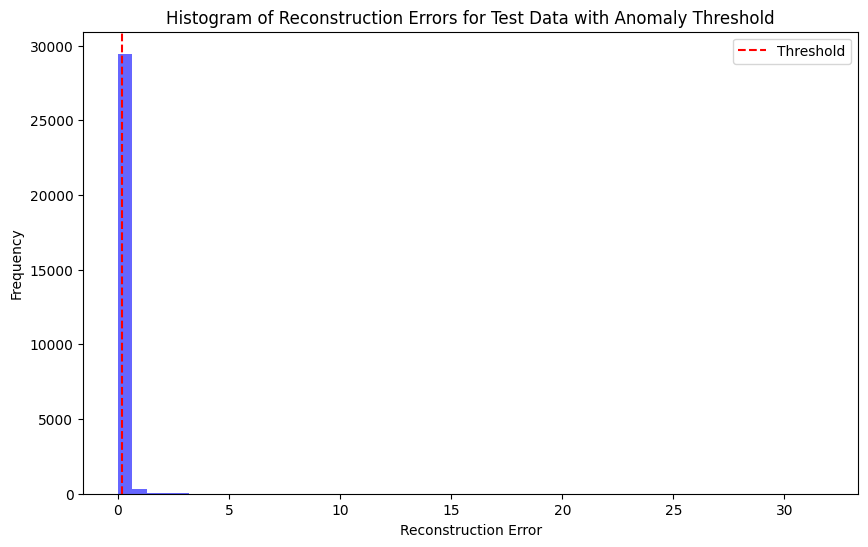

In [19]:
X_test_pred_gru = model_gru.predict(X_test_lstm)

# Calculate the reconstruction error for the test data
test_mse_loss_gru = np.mean(np.power(X_test_lstm - X_test_pred_gru, 2), axis=(1, 2))

test_anomalies_gru = test_mse_loss_gru > threshold_gru
print(f"Anomaly detection threshold: {threshold_gru}")
print(f"Number of anomalies detected in test data: {np.sum(test_anomalies_gru)}")

# You can also visualize the reconstruction error distribution for the test data
plt.figure(figsize=(10, 6))
plt.hist(test_mse_loss_gru, bins=50, color='blue', alpha=0.6)
plt.axvline(threshold_gru, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors for Test Data with Anomaly Threshold')
plt.legend()
plt.show()

### Check the model in test_dataset

In [20]:
df_test_adjusted = df_test.iloc[time_steps-1:].copy()

In [21]:
threshold_gru = np.percentile(train_mse_loss_gru, 95)  # Reuse threshold from the training data

df_test_adjusted['True_Anomaly'] = 0  # Initialize with 0 (no anomaly)
df_test_adjusted.loc[test_mse_loss_gru > threshold_gru, 'True_Anomaly'] = 1

In [22]:
print("Columns in df_test_adjusted:", df_test_adjusted.columns)
if 'True_Anomaly' in df_test_adjusted.columns:
    print("True_Anomaly column found. Proceeding with evaluation.")
    precision = precision_score(df_test_adjusted['True_Anomaly'], test_anomalies_gru)
    recall = recall_score(df_test_adjusted['True_Anomaly'], test_anomalies_gru)
    f1 = f1_score(df_test_adjusted['True_Anomaly'], test_anomalies_gru)
    cm = confusion_matrix(df_test_adjusted['True_Anomaly'], test_anomalies_gru)

    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print("Test Confusion Matrix:")
    print(cm)
else:
    print("True_Anomaly column not found.")

Columns in df_test_adjusted: Index(['Date', 'Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing', 'True_Anomaly'],
      dtype='object')
True_Anomaly column found. Proceeding with evaluation.
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Test Confusion Matrix:
[[29244     0]
 [    0   663]]


In [23]:
scaler_minmax = joblib.load('scaler_minmax_df1.pkl')

original_boundary_values = {}

# Assuming columns_to_transform contains the feature names
columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_inlier_value_normalized = np.min(df_test_adjusted[feature])
    max_inlier_value_normalized = np.max(df_test_adjusted[feature])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_inlier_value_normalized
    min_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_inlier_value_normalized
    max_inlier_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    # Store the original boundary values in the dictionary
    original_boundary_values[feature] = {'min': min_inlier_value_original, 'max': max_inlier_value_original}

    # Print the original boundary values
    print(f"{feature} - Min inlier value (original scale): {min_inlier_value_original}")
    print(f"{feature} - Max inlier value (original scale): {max_inlier_value_original}")

print(original_boundary_values)

Temperature - Min inlier value (original scale): -127.00000000000001
Temperature - Max inlier value (original scale): 27.75
Turbidity - Min inlier value (original scale): 82.0
Turbidity - Max inlier value (original scale): 100.0
Dissolved_Oxygen - Min inlier value (original scale): 0.007
Dissolved_Oxygen - Max inlier value (original scale): 27.575
pH - Min inlier value (original scale): -0.5862699999999995
pH - Max inlier value (original scale): 7.657629612158515
Nitrate - Min inlier value (original scale): 331.4473292736611
Nitrate - Max inlier value (original scale): 1936.0000000000002
Ammonia - Min inlier value (original scale): 0.006769999999999978
Ammonia - Max inlier value (original scale): 258723495.09329236
{'Temperature': {'min': -127.00000000000001, 'max': 27.75}, 'Turbidity': {'min': 82.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.007, 'max': 27.575}, 'pH': {'min': -0.5862699999999995, 'max': 7.657629612158515}, 'Nitrate': {'min': 331.4473292736611, 'max': 1936.0000000000

### Plot Training and Validation Loss for Hybrid model

Visualizing the loss over epochs helps in understanding model performance:

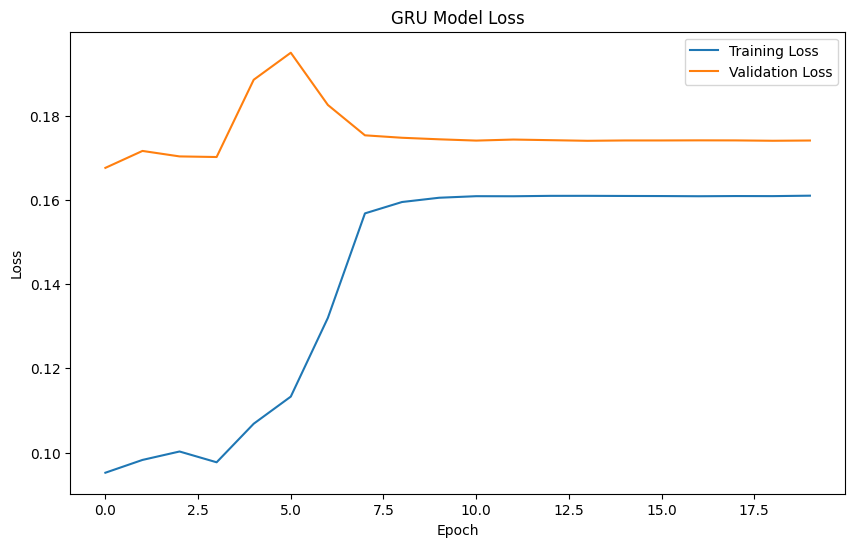

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Downsample Train data

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


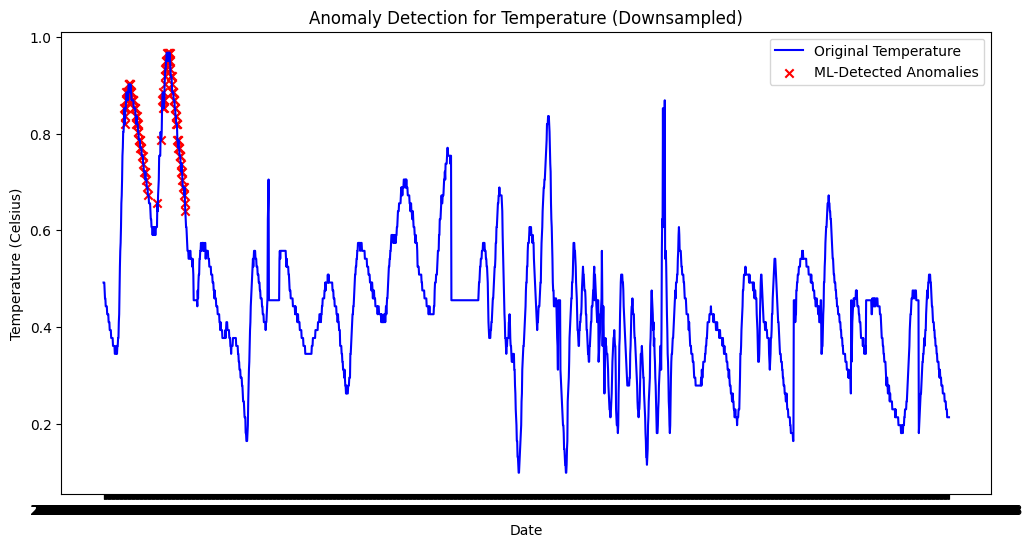

In [25]:
# Downsample the data for plotting purposes
df_train_adjusted_downsampled = df_train_adjusted.iloc[::30].copy()

# Predict using the model on downsampled data
X_train_pred_downsampled = model_gru.predict(X_train_lstm[::30])

# Calculate reconstruction error for downsampled data
train_mse_loss_downsampled = np.mean(np.power(X_train_lstm[::30] - X_train_pred_downsampled, 2), axis=(1, 2))

# Set a new threshold for downsampled data
threshold_downsampled = np.percentile(train_mse_loss_downsampled, 95)

# Detect anomalies on the downsampled data
anomalies_downsampled = train_mse_loss_downsampled > threshold_downsampled

# Update the anomalies column in the downsampled DataFrame
df_train_adjusted_downsampled['ML_Anomaly'] = anomalies_downsampled

# Plot anomalies on the downsampled original data
plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled['Date'], df_train_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled['Date'][anomalies_downsampled], df_train_adjusted_downsampled['Temperature'][anomalies_downsampled], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

## Downsampled Test data

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


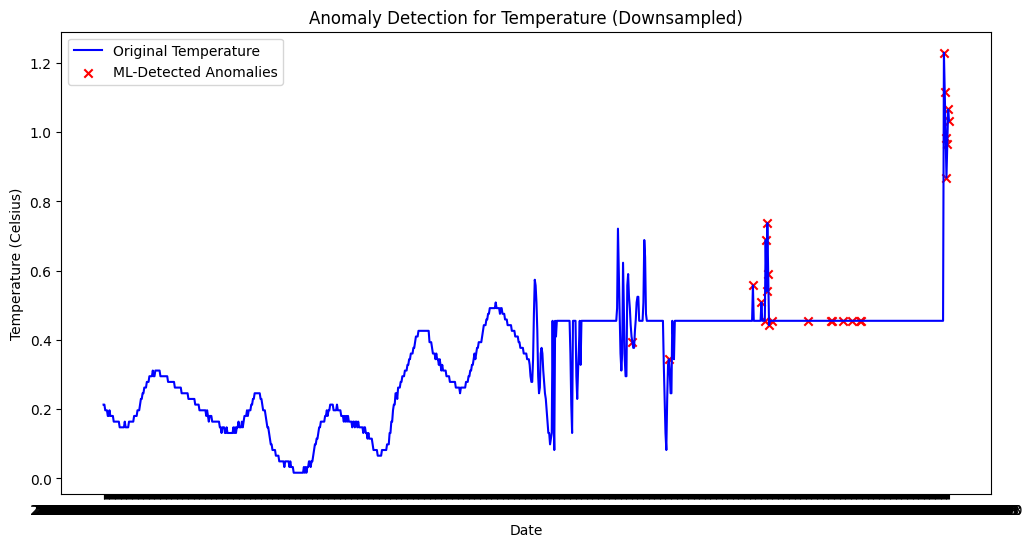

In [26]:
df_test_adjusted_downsampled = df_test_adjusted.iloc[::30].copy()

# Predict using the model on downsampled data
X_test_pred_downsampled = model_gru.predict(X_test_lstm[::30])

# Calculate reconstruction error for downsampled data
test_mse_loss_downsampled = np.mean(np.power(X_test_lstm[::30] - X_test_pred_downsampled, 2), axis=(1, 2))

# Set a new threshold for downsampled data
threshold_downsampled = np.percentile(train_mse_loss_downsampled, 95)

# Detect anomalies on the downsampled data
anomalies_downsampled = test_mse_loss_downsampled > threshold_downsampled

# Update the anomalies column in the downsampled DataFrame
df_test_adjusted_downsampled['ML_Anomaly'] = anomalies_downsampled

# Plot anomalies on the downsampled original data
plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled['Date'], df_test_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled['Date'][anomalies_downsampled], df_test_adjusted_downsampled['Temperature'][anomalies_downsampled], color='red', label='ML-Detected Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Downsampled)')
plt.legend()
plt.show()

## Implementing isolation forest on GRU model of Train dataset

2181/2181 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step
Hybrid Model Precision (Train): 0.6910
Hybrid Model Recall (Train): 1.0000
Hybrid Model F1 Score (Train): 0.8172
Confusion Matrix (Hybrid Model - Train):
[[64741  1561]
 [    0  3490]]


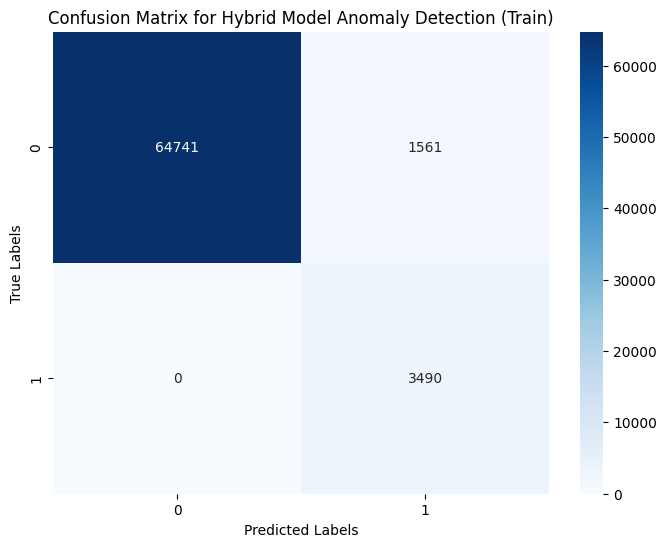

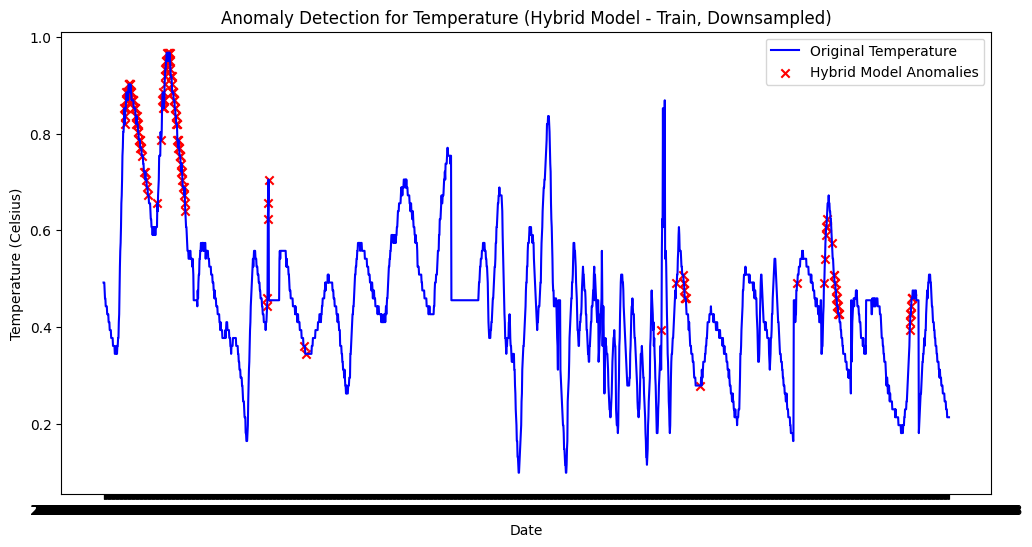

In [27]:
#Predict using the GRU model on the training data
X_train_pred_gru = model_gru.predict(X_train_lstm)

#Calculate reconstruction errors for the training data
train_mse_loss_gru = np.mean(np.power(X_train_lstm - X_train_pred_gru, 2), axis=(1, 2))

# Apply a threshold to detect anomalies with the GRU model
threshold_gru_train = np.percentile(train_mse_loss_gru, 95)
anomalies_gru_train = train_mse_loss_gru > threshold_gru_train

# Add the GRU anomalies to training DataFrame
df_train_adjusted['GRU_Anomaly'] = anomalies_gru_train.astype(int)

# Apply Isolation Forest on the GRU reconstruction errors
isolation_model_gru_train = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels_iforest_train = isolation_model_gru_train.fit_predict(train_mse_loss_gru.reshape(-1, 1))

# Convert -1 (outlier) to 1 and 1 (inlier) to 0 for consistency
anomaly_labels_iforest_train = np.where(anomaly_labels_iforest_train == -1, 1, 0)

# Add these labels to the DataFrame
df_train_adjusted['Hybrid_Anomaly'] = np.maximum(df_train_adjusted['GRU_Anomaly'], anomaly_labels_iforest_train)

# Evaluate the hybrid model's performance on the training data
precision_hybrid_train = precision_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly'])
recall_hybrid_train = recall_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly'])
f1_hybrid_train = f1_score(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly'])
cm_hybrid_train = confusion_matrix(df_train_adjusted['True_Anomaly'], df_train_adjusted['Hybrid_Anomaly'])

print(f"Hybrid Model Precision (Train): {precision_hybrid_train:.4f}")
print(f"Hybrid Model Recall (Train): {recall_hybrid_train:.4f}")
print(f"Hybrid Model F1 Score (Train): {f1_hybrid_train:.4f}")
print("Confusion Matrix (Hybrid Model - Train):")
print(cm_hybrid_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model Anomaly Detection (Train)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the anomalies detected by the hybrid model on the downsampled temperature data
df_train_adjusted_downsampled = df_train_adjusted.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_train_adjusted_downsampled['Date'], df_train_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_train_adjusted_downsampled['Date'][df_train_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            df_train_adjusted_downsampled['Temperature'][df_train_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            color='red', label='Hybrid Model Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model - Train, Downsampled)')
plt.legend()
plt.show()

In [28]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:
    
    feature_index = columns_to_transform.index(feature)
    
    min_anomaly_value_normalized = np.min(df_train_adjusted[feature][df_train_adjusted['Hybrid_Anomaly'] == 1])
    max_anomaly_value_normalized = np.max(df_train_adjusted[feature][df_train_adjusted['Hybrid_Anomaly'] == 1])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_anomaly_value_normalized
    min_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]
    
    dummy_array[0, feature_index] = max_anomaly_value_normalized
    max_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_anomaly_value_original, 'max': max_anomaly_value_original}

    # Print the original boundary values
    print(f"{feature} - Min anomaly value (original scale): {min_anomaly_value_original}")
    print(f"{feature} - Max anomaly value (original scale): {max_anomaly_value_original}")

print(original_boundary_values)

Temperature - Min anomaly value (original scale): 23.9375
Temperature - Max anomaly value (original scale): 26.8125
Turbidity - Min anomaly value (original scale): 1.0
Turbidity - Max anomaly value (original scale): 100.0
Dissolved_Oxygen - Min anomaly value (original scale): 0.015999999999998963
Dissolved_Oxygen - Max anomaly value (original scale): 39.429
pH - Min anomaly value (original scale): 7.0945
pH - Max anomaly value (original scale): 8.49266
Nitrate - Min anomaly value (original scale): 101.99999999999994
Nitrate - Max anomaly value (original scale): 819.0
Ammonia - Min anomaly value (original scale): 0.27792
Ammonia - Max anomaly value (original scale): 30466895871.999977
{'Temperature': {'min': 23.9375, 'max': 26.8125}, 'Turbidity': {'min': 1.0, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.015999999999998963, 'max': 39.429}, 'pH': {'min': 7.0945, 'max': 8.49266}, 'Nitrate': {'min': 101.99999999999994, 'max': 819.0}, 'Ammonia': {'min': 0.27792, 'max': 30466895871.999977}}


## Applied the train threshold on test dataset

935/935 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step
Hybrid Model Precision (Test): 0.3963
Hybrid Model Recall (Test): 1.0000
Hybrid Model F1 Score (Test): 0.5676
Confusion Matrix (Hybrid Model - Test):
[[28234  1010]
 [    0   663]]


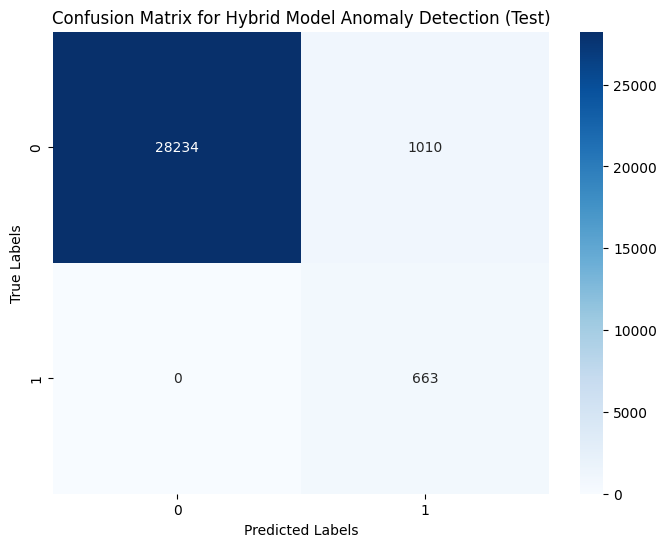

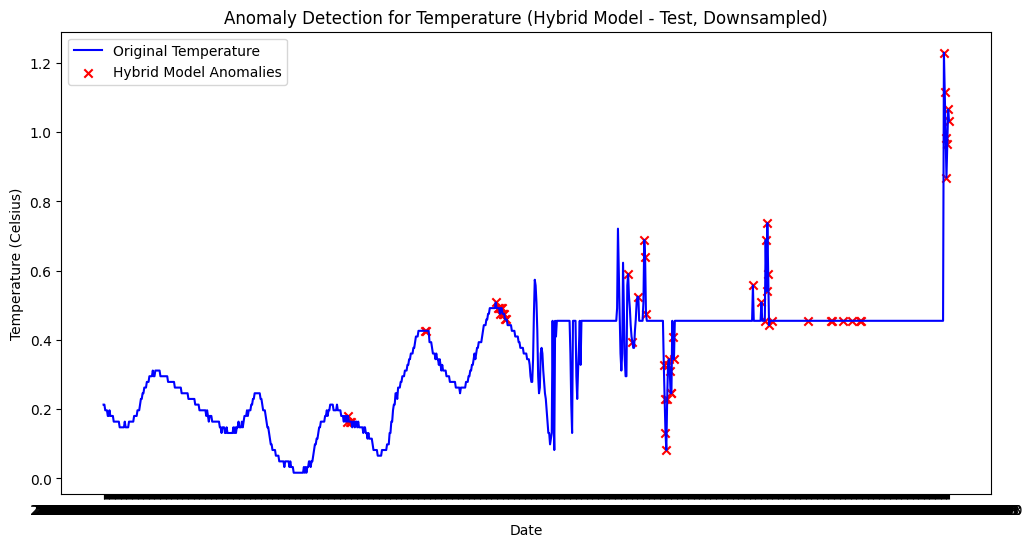

In [38]:
X_test_pred_gru = model_gru.predict(X_test_lstm)

test_mse_loss_gru = np.mean(np.power(X_test_lstm - X_test_pred_gru, 2), axis=(1, 2))

threshold_gru_test = np.percentile(test_mse_loss_gru, 95)
test_anomalies_gru = test_mse_loss_gru > threshold_gru_test

df_test_adjusted['GRU_Anomaly'] = test_anomalies_gru.astype(int)

anomaly_labels_iforest_test = isolation_model_gru_train.predict(test_mse_loss_gru.reshape(-1, 1))

# Convert -1 (outlier) to 1 and 1 (inlier) to 0 for consistency
anomaly_labels_iforest_test = np.where(anomaly_labels_iforest_test == -1, 1, 0)

df_test_adjusted['Hybrid_Anomaly'] = np.maximum(df_test_adjusted['GRU_Anomaly'], anomaly_labels_iforest_test)

# Evaluate the hybrid model's performance on the test data
precision_hybrid_test = precision_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly'])
recall_hybrid_test = recall_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly'])
f1_hybrid_test = f1_score(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly'])
cm_hybrid_test = confusion_matrix(df_test_adjusted['True_Anomaly'], df_test_adjusted['Hybrid_Anomaly'])

print(f"Hybrid Model Precision (Test): {precision_hybrid_test:.4f}")
print(f"Hybrid Model Recall (Test): {recall_hybrid_test:.4f}")
print(f"Hybrid Model F1 Score (Test): {f1_hybrid_test:.4f}")
print("Confusion Matrix (Hybrid Model - Test):")
print(cm_hybrid_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Model Anomaly Detection (Test)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the anomalies detected by the hybrid model on the downsampled temperature data for test data
df_test_adjusted_downsampled = df_test_adjusted.iloc[::30].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_test_adjusted_downsampled['Date'], df_test_adjusted_downsampled['Temperature'], label='Original Temperature', color='blue')
plt.scatter(df_test_adjusted_downsampled['Date'][df_test_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            df_test_adjusted_downsampled['Temperature'][df_test_adjusted_downsampled['Hybrid_Anomaly'] == 1], 
            color='red', label='Hybrid Model Anomalies', marker='x')

plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Anomaly Detection for Temperature (Hybrid Model - Test, Downsampled)')
plt.legend()
plt.show()

In [41]:
original_boundary_values = {}

columns_to_transform = ['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate', 'Ammonia']

# Loop through each normalized feature
for feature in columns_to_transform:

    feature_index = columns_to_transform.index(feature)

    min_anomaly_value_normalized = np.min(df_test_adjusted[feature][df_test_adjusted['Hybrid_Anomaly'] == 1])
    max_anomaly_value_normalized = np.max(df_test_adjusted[feature][df_test_adjusted['Hybrid_Anomaly'] == 1])

    dummy_array = np.zeros((1, len(columns_to_transform)))

    dummy_array[0, feature_index] = min_anomaly_value_normalized
    min_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    dummy_array[0, feature_index] = max_anomaly_value_normalized
    max_anomaly_value_original = scaler_minmax.inverse_transform(dummy_array)[0, feature_index]

    original_boundary_values[feature] = {'min': min_anomaly_value_original, 'max': max_anomaly_value_original}

    # Print the original boundary values
    print(f"{feature} - Min anomaly value (original scale): {min_anomaly_value_original}")
    print(f"{feature} - Max anomaly value (original scale): {max_anomaly_value_original}")

print(original_boundary_values)

Temperature - Min anomaly value (original scale): -127.00000000000001
Temperature - Max anomaly value (original scale): 27.6875
Turbidity - Min anomaly value (original scale): 85.8862238717022
Turbidity - Max anomaly value (original scale): 100.0
Dissolved_Oxygen - Min anomaly value (original scale): 0.007
Dissolved_Oxygen - Max anomaly value (original scale): 14.652647905892268
pH - Min anomaly value (original scale): -0.5862699999999995
pH - Max anomaly value (original scale): 7.657629612158515
Nitrate - Min anomaly value (original scale): 331.4473292736611
Nitrate - Max anomaly value (original scale): 1663.0
Ammonia - Min anomaly value (original scale): 0.06272999999999998
Ammonia - Max anomaly value (original scale): 258723495.09329236
{'Temperature': {'min': -127.00000000000001, 'max': 27.6875}, 'Turbidity': {'min': 85.8862238717022, 'max': 100.0}, 'Dissolved_Oxygen': {'min': 0.007, 'max': 14.652647905892268}, 'pH': {'min': -0.5862699999999995, 'max': 7.657629612158515}, 'Nitrate'

#### Save the model

In [31]:
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Save the model
model_gru.save('gru_model_df1.h5')

#### Load the model

In [32]:
model_gru = load_model('gru_model_df1.h5', custom_objects={'MeanAbsoluteError': MeanAbsoluteError})

In [33]:
split_index = int(0.9 * X_train_lstm.shape[0])
X_val_lstm = X_train_lstm[split_index:]
X_train_lstm_actual = X_train_lstm[:split_index]

# Recalculate validation predictions
X_val_pred = model_gru.predict(X_val_lstm)

# Calculate MSE for validation and test datasets
val_mse_loss_gru = mean_squared_error(X_val_lstm.reshape(-1, X_val_lstm.shape[2]), X_val_pred.reshape(-1, X_val_pred.shape[2]))
test_mse_loss_gru = mean_squared_error(X_test_lstm.reshape(-1, X_test_lstm.shape[2]), X_test_pred_gru.reshape(-1, X_test_pred_gru.shape[2]))

# Store the results in a dictionary
model_results = {
    'GRU': {
        'Validation MSE': val_mse_loss_gru,
        'Test MSE': test_mse_loss_gru
    }
}

# Print the results
print("Validation MSE:", val_mse_loss_gru)
print("Test MSE:", test_mse_loss_gru)

219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Validation MSE: 0.043784358
Test MSE: 0.0798511


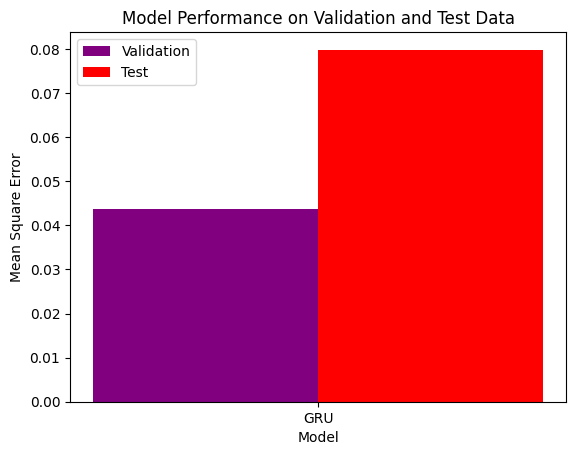

In [34]:
model_names = list(model_results.keys())
validation_mse = [model_results[name]['Validation MSE'] for name in model_names]
test_mse = [model_results[name]['Test MSE'] for name in model_names]

# Plotting the bar chart
fig, ax = plt.subplots()

index = np.arange(len(model_names))
bar_width = 0.35

bars1 = ax.bar(index, validation_mse, bar_width, label='Validation', color='purple')
bars2 = ax.bar(index + bar_width, test_mse, bar_width, label='Test', color='red')

ax.set_xlabel('Model')
ax.set_ylabel('Mean Square Error')
ax.set_title('Model Performance on Validation and Test Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

In [35]:
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Save the model
model_gru.save('gru_model_df1.h5')